In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
coin_tosses=(np.random.rand(10000, 10) < 0.51).astype(np.int32)

In [3]:
np.cumsum(coin_tosses, axis=0)

array([[   1,    0,    0, ...,    1,    0,    1],
       [   2,    0,    1, ...,    1,    0,    2],
       [   3,    1,    1, ...,    2,    0,    2],
       ...,
       [5009, 5068, 5088, ..., 5126, 5087, 5066],
       [5009, 5068, 5089, ..., 5127, 5088, 5067],
       [5009, 5068, 5089, ..., 5128, 5089, 5067]], dtype=int32)

In [4]:
cumulative_heads_ratio = np.cumsum(coin_tosses, axis=0)/np.arange(1, 10001).reshape(-1,1)

[0, 10000, 0.42, 0.58]

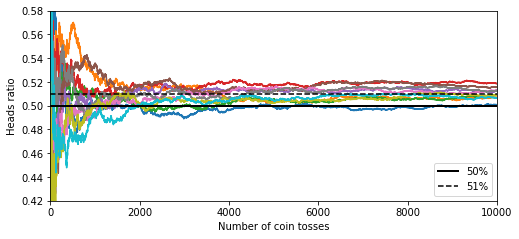

In [5]:
plt.figure(figsize=(8,3.5))
plt.plot(cumulative_heads_ratio)
plt.plot([0,10000],[0.5,0.5],"k-",linewidth = 2,label="50%")
plt.plot([0,10000],[0.51,0.51],"k--",label="51%")
plt.xlabel("Number of coin tosses")
plt.ylabel("Heads ratio")
plt.legend(loc="lower right")
plt.axis([0, 10000, 0.42, 0.58])


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

In [7]:
X,y = make_moons(n_samples=500,noise=0.3,random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)#default test_size = 0.25

# 投票分类

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [9]:
log_clf = LogisticRegression(solver="liblinear", random_state=42)
svc_clf = SVC(gamma="auto", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)

voting_clf = VotingClassifier(estimators=[("log_clf",log_clf),("svc_clf",svc_clf),("rnd_clf",rnd_clf)],voting='hard')

In [10]:
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('log_clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)), ('svc_c...mators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [11]:
from sklearn.metrics import accuracy_score

for clf in (log_clf,svc_clf,rnd_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_pred,y_test))

LogisticRegression 0.864
SVC 0.888
RandomForestClassifier 0.872
VotingClassifier 0.896


### 可以通过修改SVC的probability参数为TRUE来增加predict_proba()方法以及voting_clf中voting参数中的soft来使用软投票

In [12]:
log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="auto", probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.912


# Bagging（有放回采样） and Pasting（无放回采样）

In [13]:
X_train.shape

(375, 2)

In [14]:
[np.random.randint(0,375) for _ in range(10)]

[0, 50, 40, 68, 111, 365, 26, 272, 1, 26]

In [15]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [16]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,max_samples=100,bootstrap=True,n_jobs=-1)

In [17]:
bag_clf.fit(X_train,y_train)
y_pred = bag_clf.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.912

In [19]:
de_clf = DecisionTreeClassifier(random_state=42)
de_clf.fit(X_train,y_train)
y_pred = de_clf.predict(X_test)
accuracy_score(y_pred,y_test)

0.856

In [20]:
from matplotlib.colors import ListedColormap

def plot_tree(clf,X,y,axes):
    x1s = np.linspace(axes[0],axes[1],300)
    x2s = np.linspace(axes[2],axes[3],300)
    x1,x2 = np.meshgrid(x1s,x2s)
    X_new = np.c_[x1.ravel(),x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1,x2,y_pred,alpha=0.6,cmap=custom_cmap)
    plt.plot(X[:,0][y==0],X[:,1][y==0],"yo")
    plt.plot(X[:,0][y==1],X[:,1][y==1],"bo")
    
    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    
    plt.axis(axes)
    plt.xlabel(r"$x1$")
    plt.ylabel(r"$x2$",rotation=0)
    
    

Text(0.5,1,'Decision Tree ')

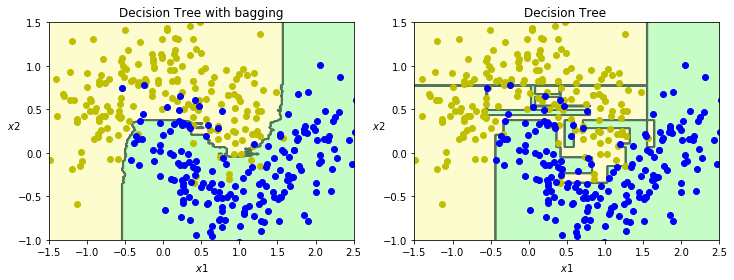

In [21]:

plt.figure(figsize=(12,4))
plt.subplot(121)
plot_tree(bag_clf,X_train,y_train,[-1.5,2.5,-1.0,1.5])
plt.title("Decision Tree with bagging")

#plt.figure(figsize=(8,4))
plt.subplot(122)
plot_tree(de_clf,X_train,y_train,[-1.5,2.5,-1.0,1.5])
plt.title("Decision Tree ")


In [22]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,bootstrap=True, n_jobs=-1, oob_score=True)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.8986666666666666

In [23]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.896

In [24]:
bag_clf.oob_decision_function_

array([[0.36170213, 0.63829787],
       [0.29946524, 0.70053476],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.0862069 , 0.9137931 ],
       [0.41764706, 0.58235294],
       [0.01630435, 0.98369565],
       [0.99441341, 0.00558659],
       [0.97905759, 0.02094241],
       [0.78881988, 0.21118012],
       [0.        , 1.        ],
       [0.82872928, 0.17127072],
       [0.85632184, 0.14367816],
       [0.98064516, 0.01935484],
       [0.04060914, 0.95939086],
       [0.01069519, 0.98930481],
       [0.98907104, 0.01092896],
       [0.96703297, 0.03296703],
       [0.99492386, 0.00507614],
       [0.01069519, 0.98930481],
       [0.37623762, 0.62376238],
       [0.95024876, 0.04975124],
       [1.        , 0.        ],
       [0.96891192, 0.03108808],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.00529101, 0.99470899],
       [0.64088398, 0.35911602],
       [0.

# 随机贴片与随机子空间

### baggingClassifier 也支持采样特征 对特征采样（ bootstrap_features=True 并且/或者 max_features 小于 1.0）叫做随机子空间。
### 采样特征导致更多的预测多样性，用高偏差换低方差
### 随机森林模型可以输出特征重要度

In [25]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)
accuracy_score(y_pred_rf,y_test)

0.92

In [26]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.0891531416651558
sepal width (cm) 0.02294898741049618
petal length (cm) 0.41595666914460316
petal width (cm) 0.47194120177974486


# 提升
# Adaboost（适应性提升）

In [27]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200,
algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
accuracy_score(y_pred,y_test)

0.896

Text(0.5,1,'Decision Tree with Adaboost')

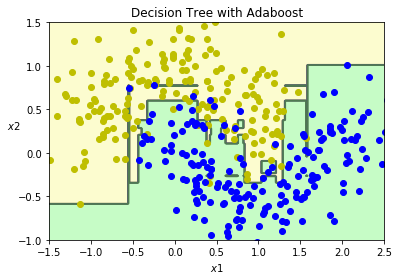

In [28]:
plot_tree(ada_clf,X_train,y_train,[-1.5,2.5,-1.0,1.5])
plt.title("Decision Tree with Adaboost")

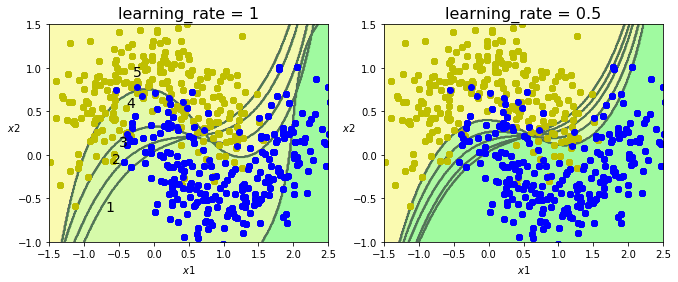

In [29]:
m = len(X_train)

plt.figure(figsize=(11, 4))
for subplot, learning_rate in ((121, 1), (122, 0.5)):
    sample_weights = np.ones(m)
    plt.subplot(subplot)
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.05, gamma="auto", random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights)
        y_pred = svm_clf.predict(X_train)
        sample_weights[y_pred != y_train] *= (1 + learning_rate)  #更改样本权重
        plot_tree(svm_clf, X, y,[-1.5,2.5,-1.0,1.5])
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)
    if subplot == 121:
        plt.text(-0.7, -0.65, "1", fontsize=14)
        plt.text(-0.6, -0.10, "2", fontsize=14)
        plt.text(-0.5,  0.10, "3", fontsize=14)
        plt.text(-0.4,  0.55, "4", fontsize=14)
        plt.text(-0.3,  0.90, "5", fontsize=14)

plt.show()

# GBRT 梯度提升

In [32]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [93]:
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X,y)
y2 = y - tree_reg1.predict(X)

tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X,y2)
y3 = y2 - tree_reg2.predict(X)

tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X,y3)
#y2 = y - tree_reg1.predict(y3)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [103]:
def plot_Residuals_and_tree_predictions(reg,X,y,axes,subplot,label):
    X_new = np.linspace(axes[0],axes[1],100).reshape(-1,1)
    y_pred = sum(tree.predict(X_new) for tree in reg)
    plt.subplot(subplot)
    if subplot%2==1 :
        #plt.subplot(321)
        plt.plot(X_new,y_pred,"g-",label=label)
        plt.plot(X,y,"b.",label="Training set")
        plt.xlabel(r"$x_{1}$")
        #plt.ylabel("y")
        #plt.axis(axes)
        
        #plt.legend()
        
    if subplot%2==0:
        #plt.subplot(321)
        #y_pred = sum(tree.predict(X_new) for tree in reg)
        plt.plot(X_new,y_pred,"r-",label=label)
        plt.plot(X,y,"b.",label="Training set") 
        #plt.xlabel(r"$x_{1}$")
        plt.ylabel("y")
        
        
    plt.axis(axes)
    plt.legend()

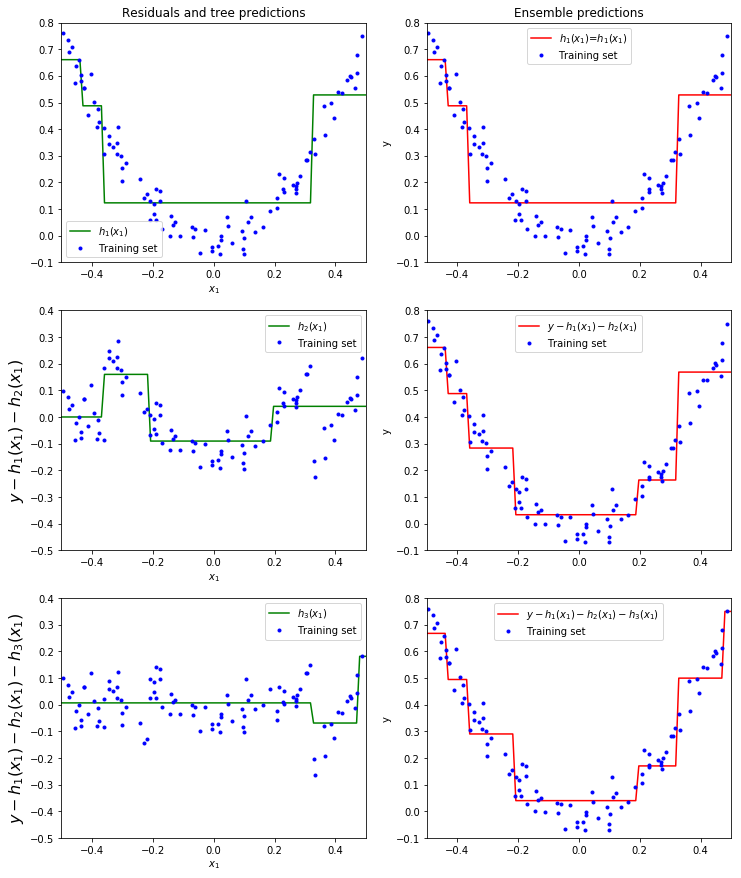

In [104]:
plt.figure(figsize=(12,15))
plot_Residuals_and_tree_predictions([tree_reg1],X,y,[-0.5,0.5,-0.1,0.8],321,"$h_1(x_1)$")
plt.title("Residuals and tree predictions")

plot_Residuals_and_tree_predictions([tree_reg2],X,y2,[-0.5,0.5,-0.5,0.4],323,"$h_2(x_1)$")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)

plot_Residuals_and_tree_predictions([tree_reg3],X,y3,[-0.5,0.5,-0.5,0.4],325,"$h_3(x_1)$")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)-h_3(x_1)$", fontsize=16)

plot_Residuals_and_tree_predictions([tree_reg1],X,y,[-0.5,0.5,-0.1,0.8],322,"$h_1(x_1)$=$h_1(x_1)$")
plt.title("Ensemble predictions")
plot_Residuals_and_tree_predictions([tree_reg1,tree_reg2],X,y,[-0.5,0.5,-0.1,0.8],324,"$y - h_1(x_1) - h_2(x_1)$")


plot_Residuals_and_tree_predictions([tree_reg1,tree_reg2,tree_reg3],X,y,[-0.5,0.5,-0.1,0.8],326,"$y - h_1(x_1) - h_2(x_1)-h_3(x_1)$")


In [101]:
from sklearn.ensemble import GradientBoostingRegressor

In [102]:
gbrt1 = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt2 = GradientBoostingRegressor(max_depth=2, n_estimators=500, learning_rate=0.1, random_state=42)

gbrt1.fit(X,y)
gbrt2.fit(X,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

Text(0.5,1,'learning rate = 0.1,n_estimators = 500')

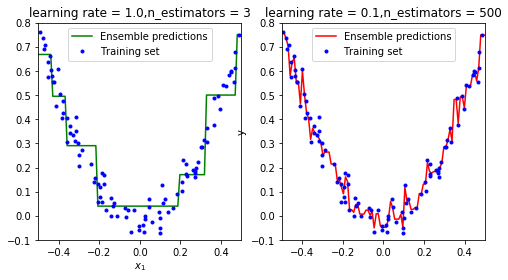

In [107]:
plt.figure(figsize=(8,4))
plot_Residuals_and_tree_predictions([gbrt1],X,y,[-0.5,0.5,-0.1,0.8],121,"Ensemble predictions")
plt.title("learning rate = 1.0,n_estimators = 3")

plot_Residuals_and_tree_predictions([gbrt2],X,y,[-0.5,0.5,-0.1,0.8],122,"Ensemble predictions")
plt.title("learning rate = 0.1,n_estimators = 500")

In [109]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [111]:
X_train,X_val,y_train,y_val = train_test_split(X,y)

gbrt = GradientBoostingRegressor(max_depth=2,n_estimators=128)
gbrt.fit(X_train,y_train)

error = [mean_squared_error(y_val,y_pred) for y_pred in gbrt.staged_predict(X_val)]
bst_estimators = np.argmin(error)

gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_estimators)
gbrt.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=128, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

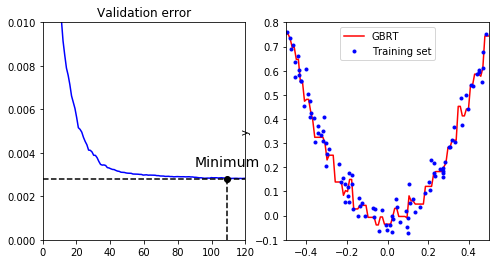

In [126]:
plt.figure(figsize=(8,4))

plt.subplot(121)
plt.plot(np.linspace(0,128,128),error,"b-")
plt.plot([0,120],[np.min(error),np.min(error)],"k--")
plt.plot([bst_estimators, bst_estimators], [0, np.min(error)], "k--")
plt.axis([0,120,0,0.01])
plt.plot(bst_estimators, np.min(error), "ko")
plt.text(bst_estimators, np.min(error)*1.2, "Minimum", ha="center", fontsize=14)
plt.title("Validation error")

plot_Residuals_and_tree_predictions([gbrt],X,y,[-0.5,0.5,-0.1,0.8],122,"GBRT")

In [127]:
min_val_error = float("inf")

In [128]:
min_val_error

inf

In [129]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error 
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping

In [130]:
print(gbrt.n_estimators)

83


In [131]:
print("Minimum validation MSE:", min_val_error)

Minimum validation MSE: 0.0028952530647517963


In [132]:
try:
    import xgboost
except ImportError as ex:
    print("Error: the xgboost library is not installed.")
    xgboost = None

Error: the xgboost library is not installed.
